In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, :-1].values # locate indexes # feature dataset (exclude target)
y = dataset.iloc[:, -1].values

In [2]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [3]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [4]:
# missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [5]:
# one hot encoding for categorical vars
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [7]:
# train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [8]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [9]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [10]:
y_test

array([0, 1])

In [11]:
# standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# no scaling to dummy vars
# they already have vals betw the desired range
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471072, -0.6260377781240918],
       [1.0, 0.0, 0.0, 1.008453807952985, 1.0130429500553495],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450703],
       [0.0, 1.0, 0.0, -1.7314961608249362, -1.0943465576039322],
       [1.0, 0.0, 0.0, -0.3615211764359756, 0.42765697570554906],
       [0.0, 1.0, 0.0, 0.22561095973072184, 0.05040823668012247],
       [0.0, 0.0, 1.0, -0.16581046438040975, -0.27480619351421154],
       [0.0, 0.0, 1.0, -0.013591021670525094, -1.3285009473438525]],
      dtype=object)

In [12]:
X_test

array([[0.0, 1.0, 0.0, 1.0, 1.0],
       [0.0, 0.0, 1.0, -1.0, -1.0]], dtype=object)

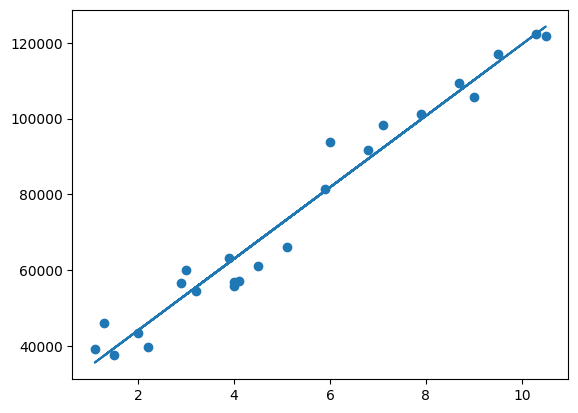

In [13]:
# simple linear regression
dataset = pd.read_csv('salary_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train))

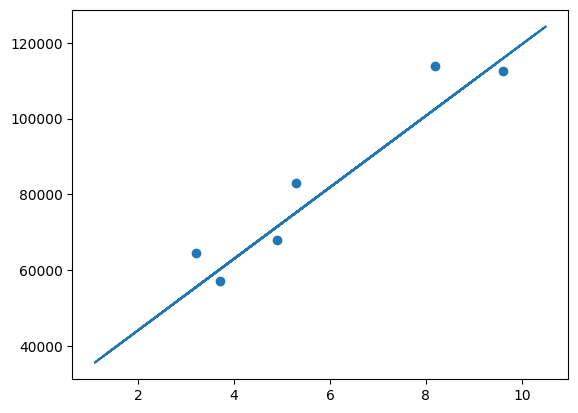

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train))

In [15]:
# multiple linear regression
dataset = pd.read_csv('startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# dummy vars for state categorical col, one hot encoding 
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
np.set_printoptions(precision=2) # 2 decimals after comma
np.concatenate((pred.reshape(len(pred), 1), (y_test.reshape(len(y_test), 1))), 1)

array([[126362.88, 134307.35],
       [ 84608.45,  81005.76],
       [ 99677.49,  99937.59],
       [ 46357.46,  64926.08],
       [128750.48, 125370.37],
       [ 50912.42,  35673.41],
       [109741.35, 105733.54],
       [100643.24, 107404.34],
       [ 97599.28,  97427.84],
       [113097.43, 122776.86]])

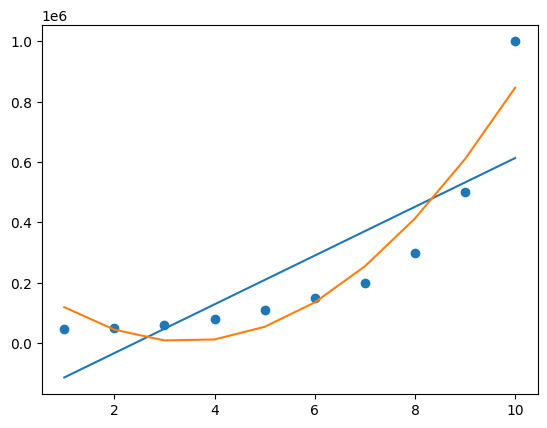

In [16]:
# polynomial regression
dataset = pd.read_csv('salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# linear reg
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# polynomial reg
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(X, y) # real ones
plt.plot(X, lin_reg.predict(X))
plt.plot(X, lin_reg_2.predict(X_poly))

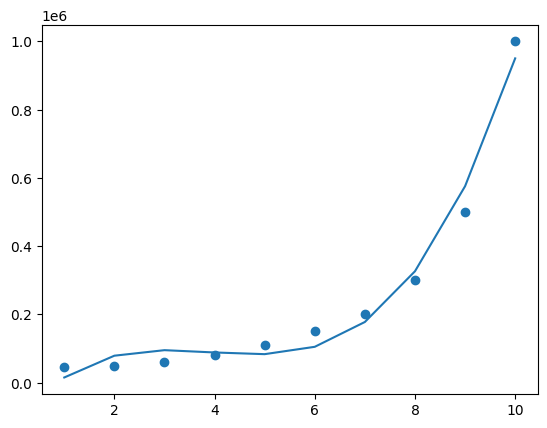

In [17]:
# degree 3
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, lin_reg_2.predict(X_poly))

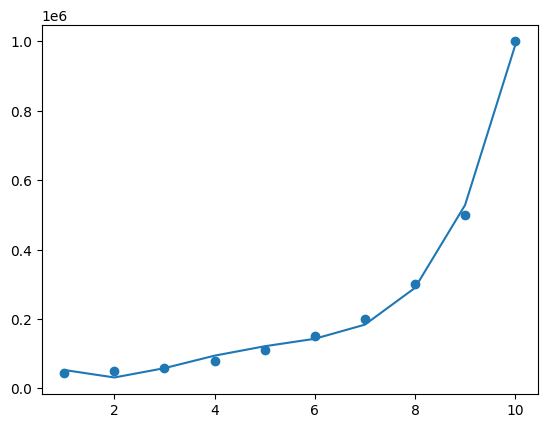

In [18]:
# degree 4
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(X, y)
plt.plot(X, lin_reg_2.predict(X_poly))

/var/folders/_b/d7jmbvqd7mb62q71b1079s340000gn/T/ipykernel_42771/380834943.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


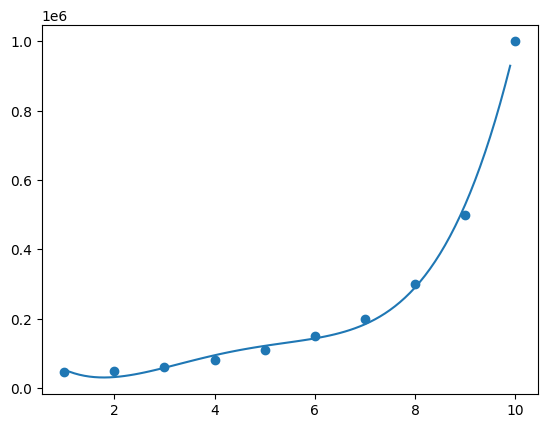

In [19]:
# smooth curve
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y)
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)))

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


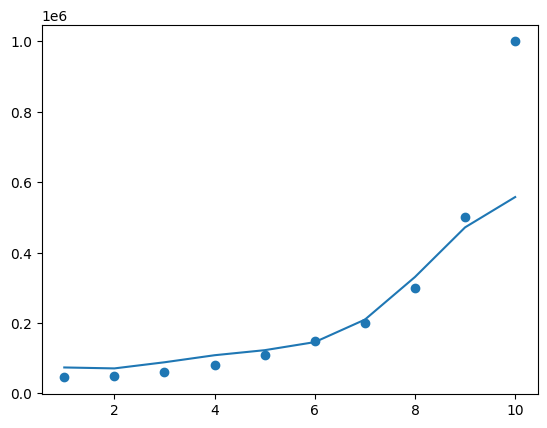

In [20]:
# svr
dataset = pd.read_csv('salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)

sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y))
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)))

/var/folders/_b/d7jmbvqd7mb62q71b1079s340000gn/T/ipykernel_42771/3367291539.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


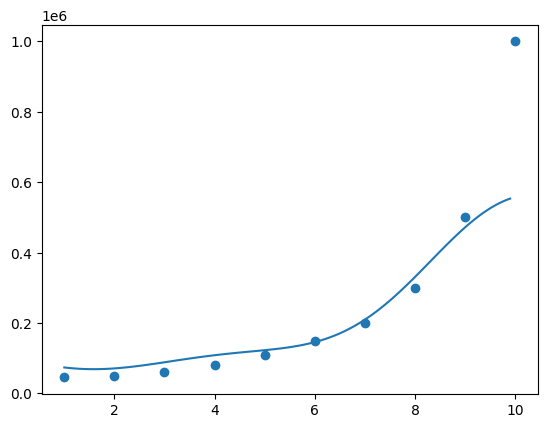

In [21]:
# smooth curve
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y))
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)))

/var/folders/_b/d7jmbvqd7mb62q71b1079s340000gn/T/ipykernel_42771/4178983553.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


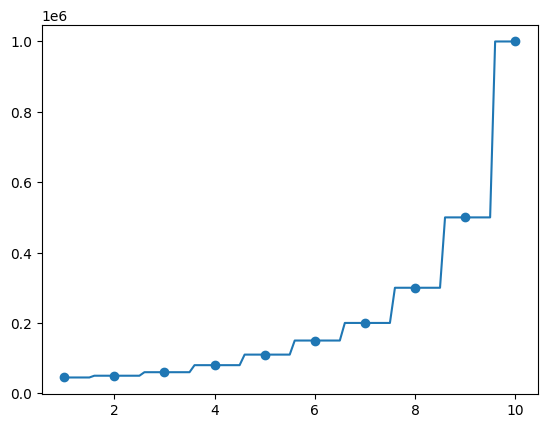

In [22]:
# decision tree regression
dataset = pd.read_csv('salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

from sklearn.tree import DecisionTreeRegressor
# not the best model to use on a single feature dataset
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y)
plt.plot(X_grid, regressor.predict(X_grid))

/var/folders/_b/d7jmbvqd7mb62q71b1079s340000gn/T/ipykernel_42771/235271559.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


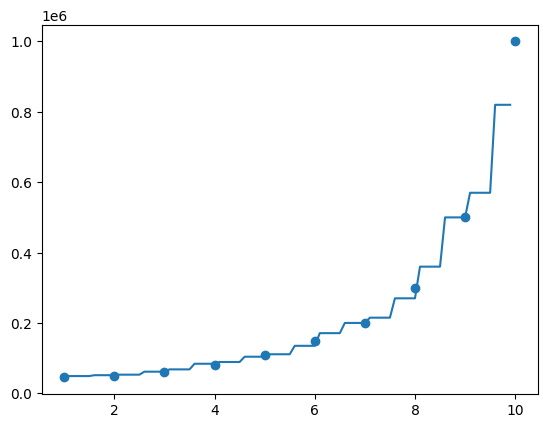

In [23]:
# random forest regression
dataset = pd.read_csv('salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

from sklearn.ensemble import RandomForestRegressor
# not the best model to use on a single feature dataset
regressor = RandomForestRegressor(n_estimators=10)
regressor.fit(X, y)

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y)
plt.plot(X_grid, regressor.predict(X_grid))

In [24]:
from sklearn.metrics import r2_score